# FordGo Bike Visualisation
## by Lahsini Badr-Eddine

## Investigation Overview

> In this investigation, I wanted to look at the bike ride trends of the bay Area bike share system. The main focus was on biking duration, biking distance, the time (weekday, hour, and month), and the bike types.

## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the year of 2018. The attributes included the trip start/end time, as well as additional measurements such as user type and gender, etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('gobike_cleaned.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The distribution of the duration in minutes and distance tarveled in km

> The following plots will show the distribution of the Avg. duration in minutes and the Avg. distance traveled. 

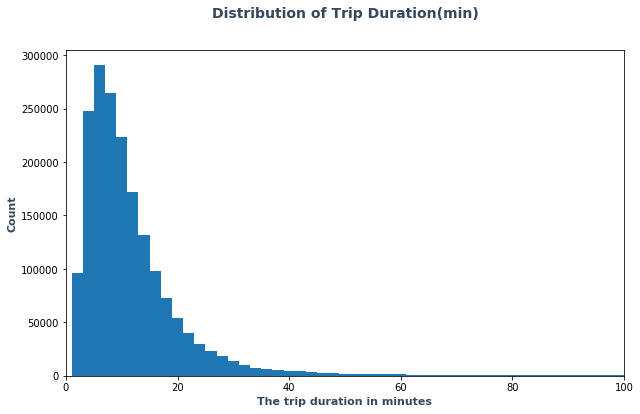

In [4]:
plt.figure(figsize=[10,6])
bins = np.arange(df['duration_min'].min(), df['duration_min'].max()+2, 2)
plt.hist(data = df , x = 'duration_min' , bins = bins)
plt.title('Distribution of Trip Duration(min)', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlim(0,100) # add an xlim since it's really hard to undersatnd the shape without the xlim
plt.xlabel('The trip duration in minutes', fontsize=11, fontweight='bold', color='#34495e')
plt.ylabel('Count', fontsize=11, fontweight='bold', color='#34495e');

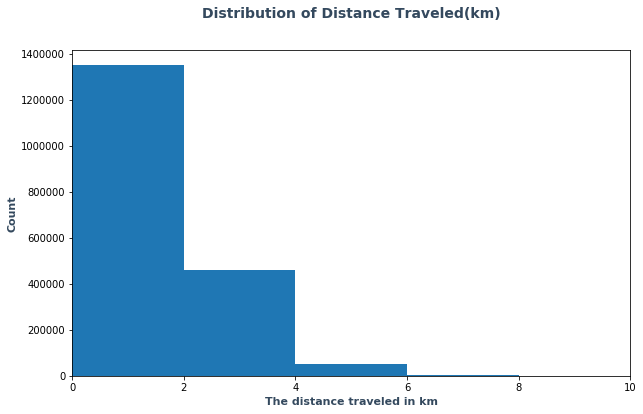

In [6]:
plt.figure(figsize=[10,6])
bins = np.arange(df['distance_km'].min(), df['distance_km'].max()+2, 2)
plt.hist(data = df , x = 'distance_km' , bins = bins)
plt.title('Distribution of Distance Traveled(km)', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlim(0,10) # add an xlim since it's really hard to undersatnd the shape without the xlim
plt.xlabel('The distance traveled in km', fontsize=11, fontweight='bold', color='#34495e')
plt.ylabel('Count', fontsize=11, fontweight='bold', color='#34495e');

## The influence of user_type on the trip duration and distance

> Here we look at the Avg. duration by User_Type, and we see clearly that casual customers are driving for long duration on average (with a significant difference) and traveled more distance (with a tiny difference) compared to subscribers.

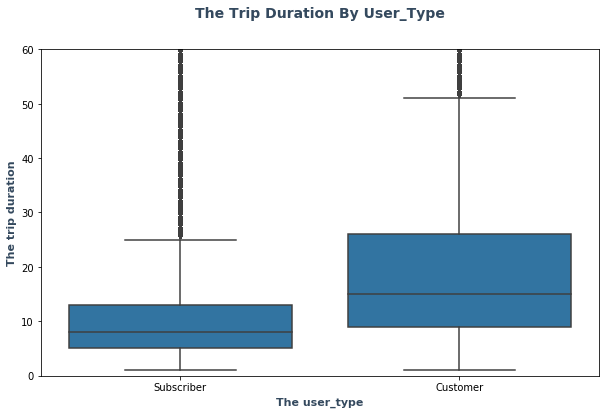

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,6])
sb.boxplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.title('The Trip Duration By User_Type', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('The user_type', fontsize=11, fontweight='bold', color='#34495e')
plt.ylabel('The trip duration', fontsize=11, fontweight='bold', color='#34495e')
plt.ylim(0,60);

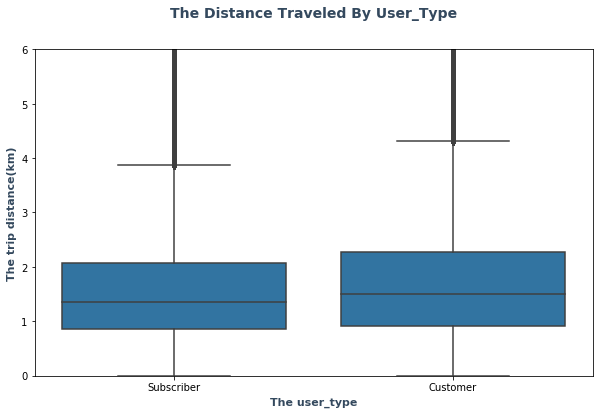

In [9]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,6])
sb.boxplot(data=df, x='user_type', y='distance_km', color=base_color)
plt.title('The Distance Traveled By User_Type', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('The user_type', fontsize=11, fontweight='bold', color='#34495e')
plt.ylabel('The trip distance(km)', fontsize=11, fontweight='bold', color='#34495e')
plt.ylim(0,6);

## Number of trips based on weekdays and user_type

> The number of trips of Subscribers is higher compared to the casual Customers' trips. On Sundays and Saturdays, we can easily see that subscribers' trips have dropped enormously, while the use of bike by casual Customers increased a bit.

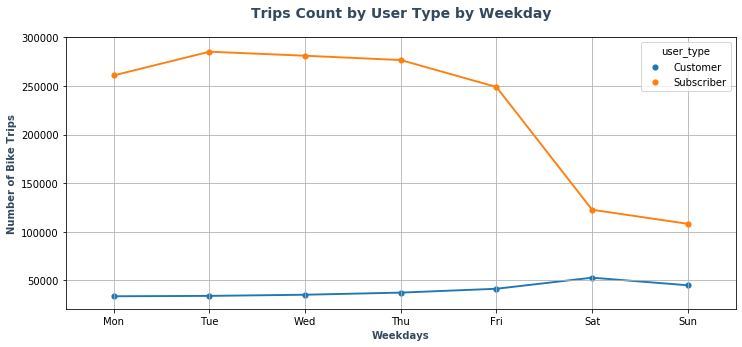

In [10]:
plt.figure(figsize=(12, 5))

weekly_userType = df.groupby(['start_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data = weekly_userType, x='start_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trips Count by User Type by Weekday', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Weekdays', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Number of Bike Trips', fontsize=10, fontweight='bold', color='#34495e')
plt.grid();

## Number of trips based by months and user_type

> The number of trips of Subscribers is higher compared to the casual Customers' trips. In summer months the number of trips has increased significantly compared to the rest of the year for the both casual customers and subscribers.

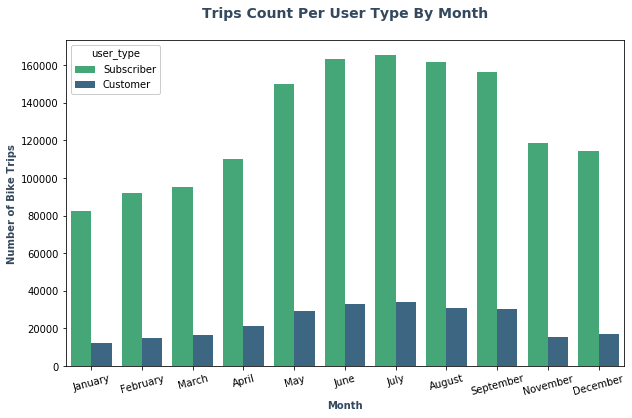

In [12]:
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.countplot(data = df, x='start_month', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=2, ncol=1, framealpha=1, title='user_type')
plt.title('Trips Count Per User Type By Month', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Month', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Number of Bike Trips', fontsize=10, fontweight='bold', color='#34495e')
plt.xticks(rotation=15);

## The variation of the Avg. duration and the Avg. distance vary during the year by user_type

> There is a significant difference in terms of Avg. duration between casual Customers and Subscribers, as Casual customers tend to ride the bike more than the Subscribers in terms of both **`Avg. minute_duration` and `Avg. distance traveled`**.

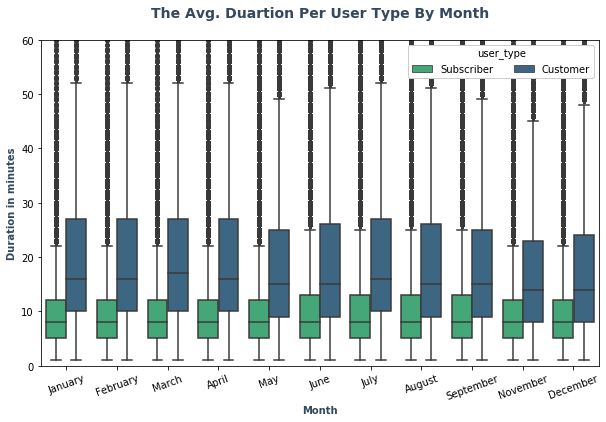

In [15]:
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.boxplot(data=df, x='start_month', y='duration_min', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=1, ncol=2, framealpha = 1, title='user_type')
plt.title('The Avg. Duartion Per User Type By Month', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Month', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Duration in minutes', fontsize=10, fontweight='bold', color='#34495e')
plt.xticks(rotation= 20)
plt.ylim(0,60);

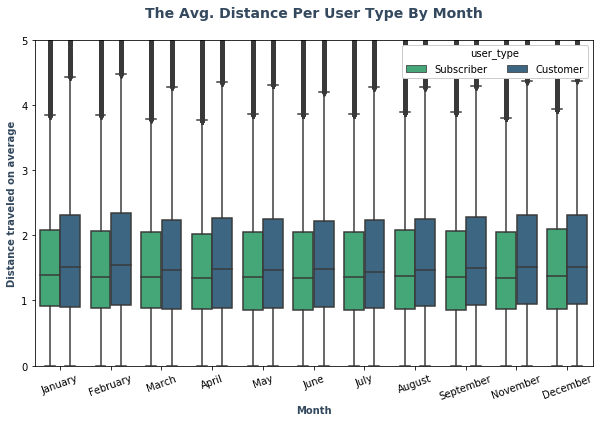

In [17]:
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.boxplot(data=df, x='start_month', y='distance_km', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=1, ncol=2, framealpha = 1,title='user_type')
plt.title('The Avg. Distance Per User Type By Month', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Month', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Distance traveled on average', fontsize=10, fontweight='bold', color='#34495e')
plt.xticks(rotation= 20)
plt.ylim(0,5);

## Relationship between distance, duration and starting hour by user_type. 

> As we have seen before, casual customers tend to use the bike for a long duration and traveled a long distance on average compared to Subscribers in general, and this is the same for the whole day as well.

> We observe that the average duration remains almost the same for Subscribers during the whole day, So we can say that subscribers tend to use the bike to commit daily tasks (like going or returning from work). On the other side, the average distance traveled by Subscribers is at the top at **`8h am`**, and register another increase at **`17h pm`**.

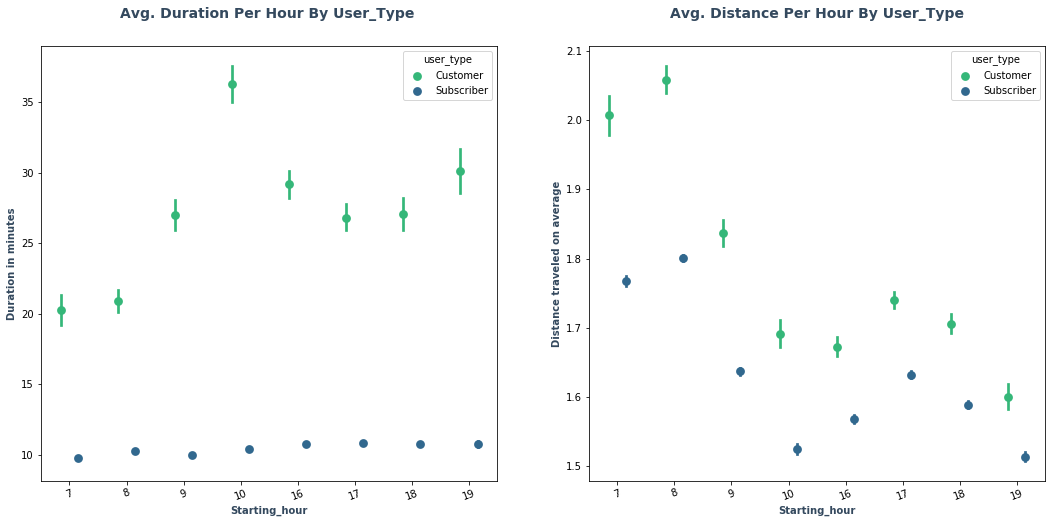

In [19]:
start_hours = df.loc[df['starting_hour'].isin([7, 8, 9, 10, 16, 17, 18, 19])]
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
ax = sb.pointplot(data = start_hours, x = 'starting_hour', y = 'duration_min',
                  hue = 'user_type', palette='viridis_r', dodge = 0.3, linestyles = "")
plt.title('Avg. Duration Per Hour By User_Type ', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Starting_hour', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Duration in minutes', fontsize=10, fontweight='bold', color='#34495e')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
ax = sb.pointplot(data = start_hours, x = 'starting_hour', y = 'distance_km',
                  hue = 'user_type', dodge = 0.3, palette='viridis_r', linestyles = "")
plt.title('Avg. Distance Per Hour By User_Type', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Starting_hour', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Distance traveled on average', fontsize=10, fontweight='bold', color='#34495e')
plt.xticks(rotation=20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!